<a href="https://colab.research.google.com/github/prachi-jangid/Unsupervised-Machine-Learning-Task-2/blob/main/Prachi_Jangid_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author:Prachi Jangid**

 **Unsupervised Machine Learning**

 **Task#2: Find the optimal number of clusters in given Iris dataset.**

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

Load the iris dataset

In [ ]:
iris = pd.read_csv("/content/drive/My Drive/Datasets/Iris.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EDA

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Finding Correlation**

In [ ]:
corr=iris.corr()

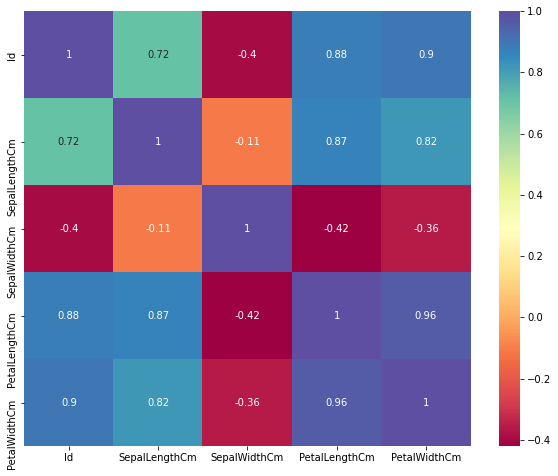

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Spectral',annot=True)

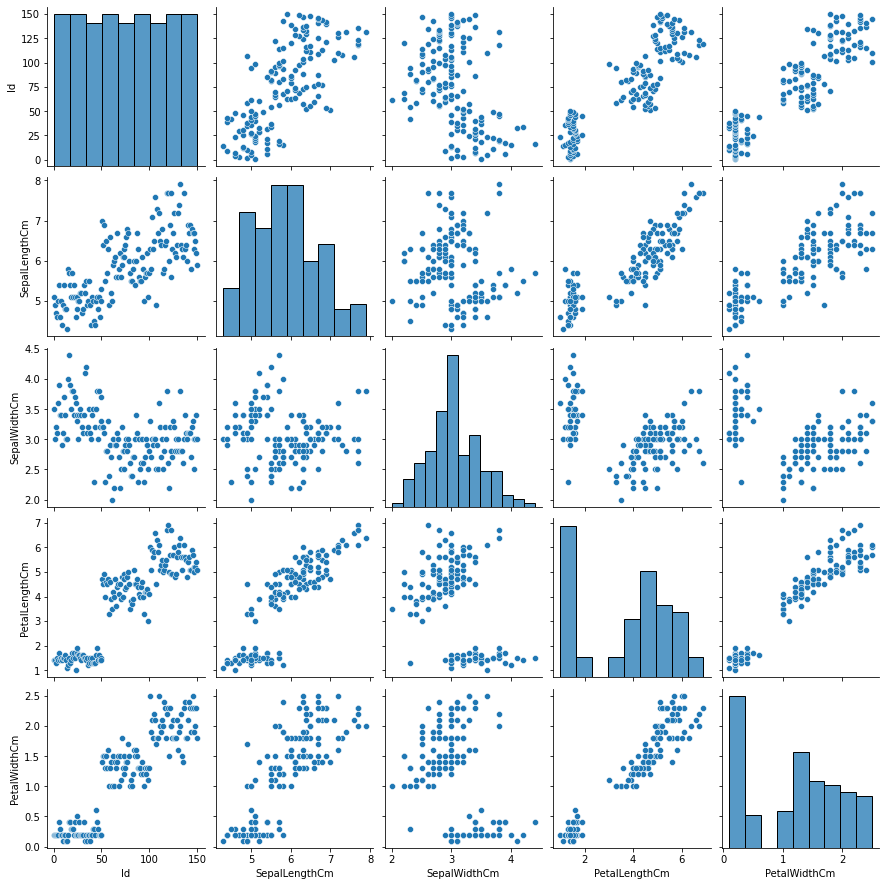

In [ ]:
sns.pairplot(iris)

**How do you find the optimum number  of clusters for k-means? How does one determine value of k?**

Let's first try using number of cluster equal to *four*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=4)
iris=iris.drop(['Species'],axis=1)
y_prediction=km.fit_predict(iris)

In [ ]:
y_prediction

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
iris['Cluster']=y_prediction

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
iris1=iris[iris['Cluster']==0]
iris2=iris[iris['Cluster']==1]
iris3=iris[iris['Cluster']==2]
iris4=iris[iris['Cluster']==3]

We will plot a scatter plot

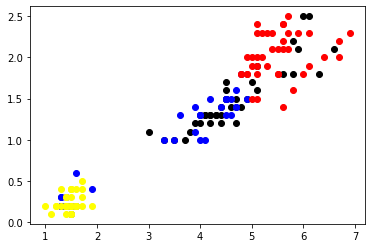

In [ ]:
#Only for first two features
plt.scatter(iris1['PetalLengthCm'],iris1['PetalWidthCm'],color='black')
plt.scatter(iris2['PetalLengthCm'],iris2['PetalWidthCm'],color='blue')
plt.scatter(iris3['PetalLengthCm'],iris3['PetalWidthCm'],color='red')
plt.scatter(iris4['PetalLengthCm'],iris4['PetalWidthCm'],color='yellow')

Here, we can clearly see that the clusters are pretty clunky and ill-matched.

### We will try to find the optimal number of clusters for our clustering problem. We are going to use the **Elbow Method** for this purpose.

In [ ]:
#WCSS is within cluster sum of square
wcss=[]
k_range=range(1,11) # k ranges from 1 to 10
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(iris)
  wcss.append(km.inertia_)

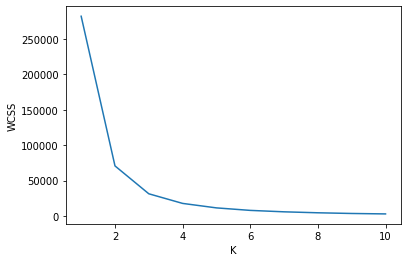

In [ ]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_range,wcss)

In the above graph it can be seen that the elbow has occured where the number of clusters is 3.

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


In [ ]:
iris.drop(['Cluster'],axis=1,inplace=True)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
 from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(iris[['PetalLengthCm']])
iris['PetalLengthCm']=scaler.transform(iris[['PetalLengthCm']])

In [ ]:
scaler.fit(iris[['PetalWidthCm']])
iris['PetalWidthCm']=scaler.transform(iris[['PetalWidthCm']])

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,1,5.1,3.5,0.067797,0.041667,1
1,2,4.9,3.0,0.067797,0.041667,1
2,3,4.7,3.2,0.050847,0.041667,1
3,4,4.6,3.1,0.084746,0.041667,1
4,5,5.0,3.6,0.067797,0.041667,1
...,...,...,...,...,...,...
145,146,6.7,3.0,0.711864,0.916667,2
146,147,6.3,2.5,0.677966,0.750000,2
147,148,6.5,3.0,0.711864,0.791667,2
148,149,6.2,3.4,0.745763,0.916667,2


In [ ]:
# Now we will apply kmeans to the iris dataset and now we know the number of clusters is 3.
 
kmeans=KMeans(n_clusters=3)
y_predicted=kmeans.fit_predict(iris[['PetalLengthCm','PetalWidthCm']])

In [ ]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
 iris['cluster']=y_predicted

In [ ]:
kmeans.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07864407, 0.06      ],
       [0.7740113 , 0.81510417]])

In [ ]:
df1=iris[iris.cluster==0]
df2=iris[iris.cluster==1]
df3=iris[iris.cluster==2]

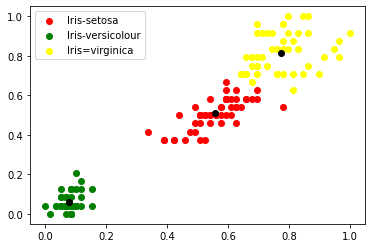

In [ ]:
# Again taking only first two features
 
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='red', label="Iris-setosa")
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green', label="Iris-versicolour")
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='yellow', label="Iris=virginica")

#for cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="black")
plt.legend() 
